## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.
* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

warnings.filterwarnings("ignore")
data = pd.read_csv('penguins_data.csv')
data.head()

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [3]:
data.isnull().sum()
#пропуски имеются

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [4]:
data = data.dropna()

In [5]:
for i in ['Sex','Species','Island','Clutch Completion']:
    print(data[i].unique())

['MALE' 'FEMALE' '.']
['Chinstrap' 'Gentoo' 'Adelie']
['Dream' 'Biscoe' 'Torgersen']
['Yes' 'No']


In [6]:
data["Sex"].value_counts()

Sex
FEMALE    163
MALE      161
.           1
Name: count, dtype: int64

#### Уберем точку из данных

In [7]:
data = data[data["Sex"] != '.']
data.head()

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971


In [8]:
dummy = pd.DataFrame()
columns_to_dummy = ["Island", "Clutch Completion", "Sex"]

for column in ["Island", "Clutch Completion", "Sex"]:
    dummies = pd.get_dummies(data[column], drop_first = True)
    dummy = pd.concat([dummy, dummies], axis = 1)
data = data.drop(columns = ["Island", "Clutch Completion", "Sex"])

data = pd.concat([data, dummy], axis = 1)
data.head()

,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Dream,Torgersen,Yes,MALE
0,Chinstrap,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True,True
1,Chinstrap,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,True,False
2,Gentoo,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,True,False
3,Chinstrap,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,True,False
4,Gentoo,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,True,False


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [9]:
a = OrdinalEncoder(categories = [['Chinstrap', 'Gentoo', 'Adelie']])
data['Species'] = a.fit_transform(data[['Species']])
data.head()

,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Dream,Torgersen,Yes,MALE
0,0.0,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True,True
1,0.0,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,True,False
2,1.0,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,True,False
3,0.0,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,True,False
4,1.0,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,True,False


In [10]:
X = data.drop(["Species"], axis = 1)
y = data["Species"]

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [11]:
np.random.seed(1488)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [12]:
res = []
scl = StandardScaler().fit(X[["Flipper Length (mm)", "Body Mass (g)"]])
X_tra = scl.transform(X_train[["Flipper Length (mm)", "Body Mass (g)"]])
X_tes = scl.transform(X_test[["Flipper Length (mm)", "Body Mass (g)"]])

print(f"{'NN':<10} {'Train Accuracy':<15} {'Test Accuracy':<15}")
print("="*40)
for n in [1, 3, 5, 10, 15, 25]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_tra, y_train)
    y_pred_test = knn.predict(X_tes)
    y_pred_train = knn.predict(X_tra)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    res.append(knn)
    
    print(f"{n} {train_accuracy:<15.2f} {test_accuracy:<15.2f}")


NN         Train Accuracy  Test Accuracy  
1 0.97            0.79           
3 0.85            0.85           
5 0.83            0.84           
10 0.80            0.87           
15 0.79            0.87           
25 0.78            0.89           


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [14]:
pip install mlxtend


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\ilyas\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [13]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

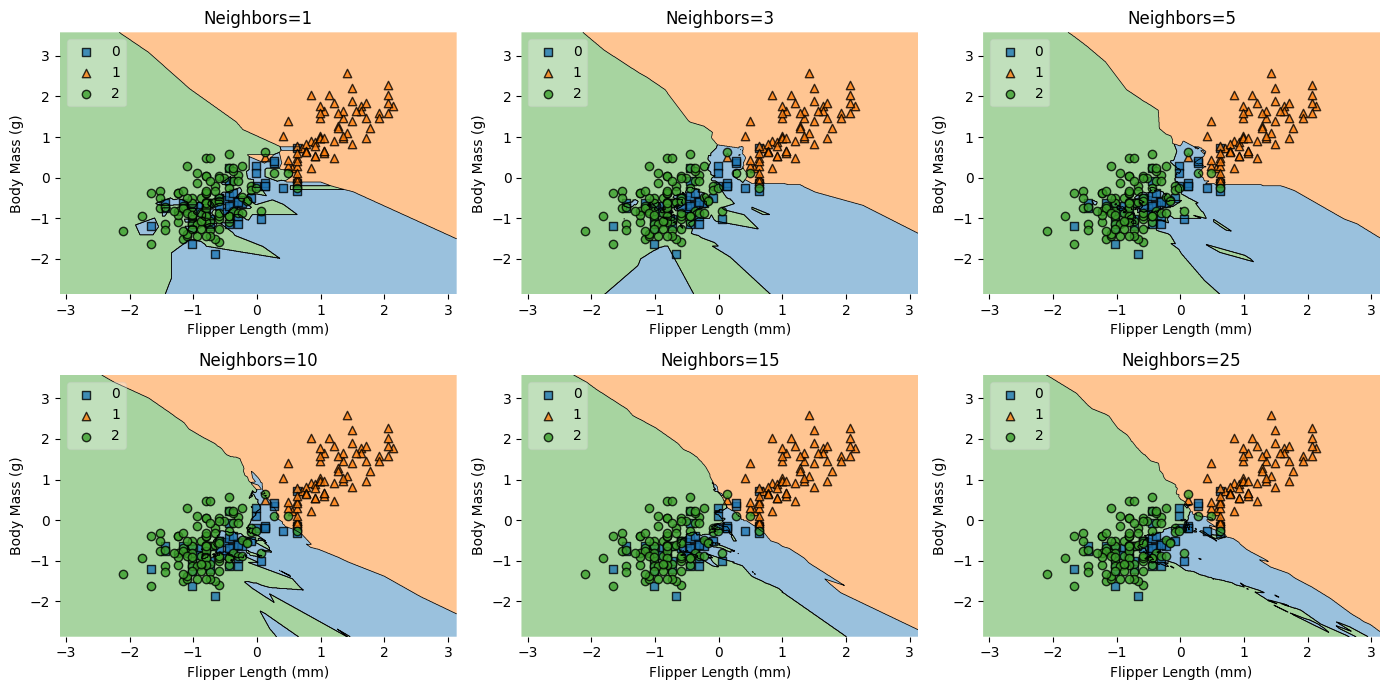

In [17]:
fig = plt.figure(figsize=(14, 7))
gs = gridspec.GridSpec(2, 3)

for i, (knn, n) in enumerate(zip(res, [1, 3, 5, 10, 15, 25])):
    sub = fig.add_subplot(gs[i // 3, i % 3])
    plot_decision_regions(X = X_tra, y=y_train.to_numpy().astype(int), clf = knn, ax = sub, legend = 2)
    
    # Теперь устанавливаем заголовок на sub, а не на fig
    sub.set_title(f'Neighbors={n}')
    sub.set_ylabel("Body Mass (g)")
    sub.set_xlabel("Flipper Length (mm)")

plt.tight_layout()
plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

#### Я считаю, что модель с 15 соседями лучше, ибо границы проведены адекватно (не как в вариантах выше, где модель тупо подстроилась под датасет (где-то, например, одного несчастного пингвина обняли в одну область)). С 25 соседями тоже вышло неплохо, но границы почему-то стали достаточно резкими. К тому же для 25 соседей требуется сильно больше вычислений, чем для 15, так что я бы выбрал модель с 15-ю соседями. Возможно её кривую стоило бы сделать чуть более гладкой и простой, но глобально, тренд угадан хорошо

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

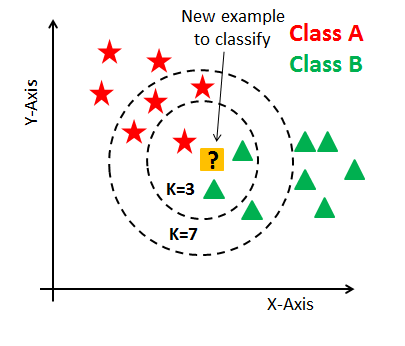

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [18]:
from collections import Counter

class KNN:
    def __init__(self, k):
        if k <= 0:
            raise ValueError("Ты адекватный? А ничо, что K должно быть положительным целым числом?")

        self.k = k

    def fit(self, X, y):
        if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
            raise ValueError("А ничо тот факт, что X и y должны быть numpy массивами!? ")
        
        if X.shape[0] != y.shape[0]:
            raise ValueError("Кринж! Количество образцов в X и y должно совпадать, иначе ничего не получится")
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            raise ValueError("Хм, вообще-то X должен быть numpy массивом.")
        if self.X_train is None or self.y_train is None:
            raise ValueError("А ничо тот факт, что сначала нужно вызвать fit?")
        
        distances = np.sqrt(np.sum((X[:, np.newaxis] - self.X_train[np.newaxis, :]) ** 2, axis=2))
        k_indices = np.argsort(distances, axis=1)[:, :self.k]
        k_nearest_labels = np.take(self.y_train, k_indices)
        most_common = [Counter(labels).most_common(1)[0][0] for labels in k_nearest_labels]
        
        return np.array(most_common)

In [19]:
# Простите за пассивную агрессию :(((((((((((((((((((((((((((((((((((
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [20]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [21]:
scl = StandardScaler().fit(X[["Flipper Length (mm)", "Body Mass (g)"]])
X_tra = scl.transform(X_train[["Flipper Length (mm)", "Body Mass (g)"]])
X_tes = scl.transform(X_test[["Flipper Length (mm)", "Body Mass (g)"]])
res = []
best_accuracy = 0
best_k = None

print(f"{'NN'} {'Train Accuracy'} {'Test Accuracy'}")

for n in [1, 3, 5, 10, 15, 25]:
    knn = KNN(k=n)
    knn.fit(X_tra, y_train.values)
    y_pred_test = knn.predict(X_tes)
    y_pred_train = knn.predict(X_tra)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"{n} {train_accuracy:<15.3f} {test_accuracy:<15.3f}")
    res.append(knn)
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = n
print("Лучшее k оказалось с 25 соседями")
print(best_accuracy)

NN Train Accuracy Test Accuracy
1 0.969           0.806          
3 0.850           0.847          
5 0.832           0.837          
10 0.832           0.857          
15 0.792           0.867          
25 0.792           0.888          
Лучшее k оказалось с 25 соседями
0.8877551020408163


А может быть все таки стоит выбрать 25 соседей, вместо 15. Хотя результат лучше всего на пару процентов... Сложна..

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [22]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [23]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

#### Я не очень хорошо разбираюсь в бриллиантах, но мне кажется, что тут все признаки важны (тем более у нас их не 100 штук, можно и жадничать памятью)

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

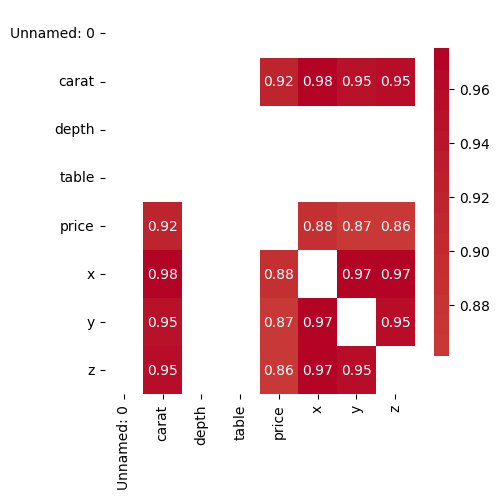

In [24]:
import seaborn as sns

correlation_matrix = data.corr(numeric_only=True)
filtered_corr = correlation_matrix[(correlation_matrix.abs() >= 0.5) & (correlation_matrix != 1.0)]
mask = filtered_corr.isnull()

plt.figure(figsize=(5, 5))
sns.heatmap(filtered_corr, mask=mask, annot=True, cmap='coolwarm', center=0, cbar_kws={"shrink": .8})
plt.show()

### Кто бы мог подумать! На цену сильнее всего влиет карат и загадочные х у и z. Ладно, никакие они не загадочные, просто карат зависит от размеров алмаза, измеряющихся по осям x y и z, все вполне просто и понятно

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [25]:
dummy = pd.DataFrame()
for i in ["cut","color","clarity"]:
    dummies = pd.get_dummies(data[i], drop_first = True)
    dummy = pd.concat([dummy, dummies], axis = 1)
data = data.drop(columns = ["cut","color","clarity"])

data = pd.concat([data, dummy], axis = 1)
data.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,Good,Ideal,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,...,False,False,False,False,False,False,True,False,False,False
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,...,False,True,False,False,False,False,False,True,False,False
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,...,False,False,True,False,False,True,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [26]:
X, y = data.drop(["Unnamed: 0", "price"], axis = 1), data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [27]:
scl = StandardScaler().fit(X)
X_tra = scl.transform(X_train)
X_tes = scl.transform(X_test)

Я не смог с этим адекватно разобраться, поэтому чтобы не нести чепуху, не напишу ничего(

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [28]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge, LassoCV
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(X_tra, y_train)
print(round(mean_squared_error(y_train, linreg.predict(X_tra)),2))
print(round(mean_squared_error(y_test, linreg.predict(X_tes)),2))

1261734.05
1313692.89


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [29]:
a = pd.DataFrame(linreg.coef_, index = X_train.columns)
a

,0
carat,5434.291566
depth,-95.797527
table,-54.426553
x,-1211.803540
y,-3.590558
z,-23.878920
Good,169.668483
Ideal,426.384705
Premium,343.907902
Very Good,310.805691


IF	943.634871
SI1	1551.516892
SI2	998.411472
VS1	1623.638386
VS2	1767.972177
VVS1	1249.138175
VVS2	1434.357454
x	-1211.803540
carat	5434.291566

Очень большие значения

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [31]:
lasso = Lasso(10)
ridge = Ridge(10)
lasso.fit(X_tra, y_train)
print(round(mean_squared_error(y_test, lasso.predict(X_tes))))
ridge.fit(X_tra, y_train)
print(round(mean_squared_error(y_test, ridge.predict(X_tes))))


1374164
1312965


In [32]:
a = pd.DataFrame(lasso.coef_, index = X_train.columns)
a

,0
carat,4933.505562
depth,-101.973624
table,-64.930925
x,-754.232968
y,-0.000000
z,-29.210684
Good,42.691499
Ideal,216.065283
Premium,153.191397
Very Good,137.470909


Ну, коэффициенты стали чуть поменьше, но все равно, как будто бы цена линейно достаточно сильно зависит от карата и в целом размера, это нельзя назвать багом в модели, скорее фича. Мультиколлинеарность 100% присутствует, как минимум между осями и каратом.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

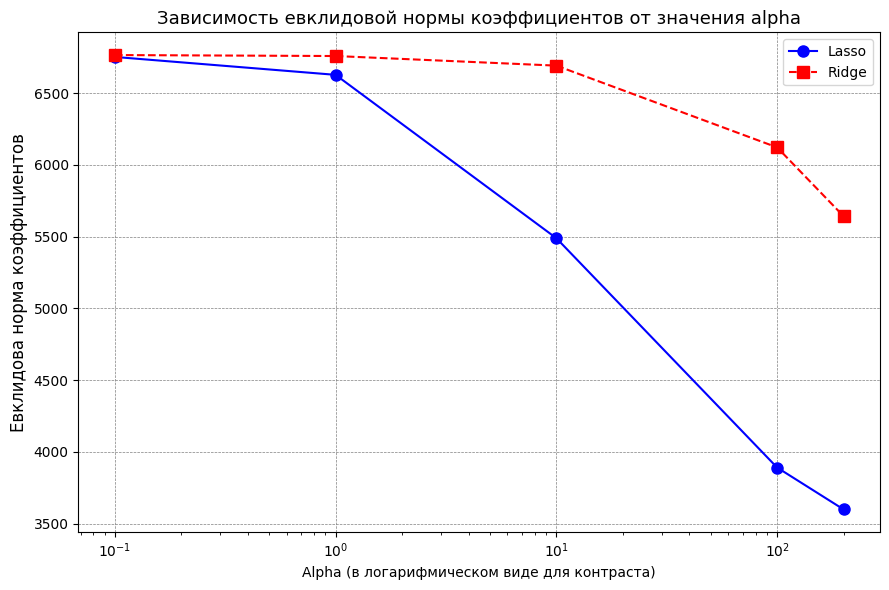

In [35]:
lasso_magnitudes = []
ridge_magnitudes = []

for i in [0.1, 1, 10, 100, 200]:
    lasso_model = Lasso(alpha = i)
    lasso_model.fit(X_tra, y_train)
    lasso_magnitudes.append(np.linalg.norm(lasso_model.coef_))

    ridge_model = Ridge(alpha = i)
    ridge_model.fit(X_tra, y_train)
    ridge_magnitudes.append(np.linalg.norm(ridge_model.coef_))

plt.figure(figsize = (9, 6))
plt.plot([0.1, 1, 10, 100, 200], lasso_magnitudes, marker='o', linestyle='-', color='blue', label='Lasso', markersize = 8)
plt.plot([0.1, 1, 10, 100, 200], ridge_magnitudes, marker='s', linestyle='--', color='red', label='Ridge', markersize = 8)
plt.xscale('log')
plt.xlabel('Alpha (в логарифмическом виде для контраста)', fontsize = 10)
plt.ylabel('Евклидова норма коэффициентов', fontsize = 12)
plt.title('Зависимость евклидовой нормы коэффициентов от значения alpha', fontsize = 13)
plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()


#### Вроде бы дело в том, что возведение в квадрат маленькие значения, они становятся еще меньше, а поэтому, таким образом нельзя занулить веса. Лассо же действует иначе, поэтому спад более резкий

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [39]:
lasso_cv = LassoCV(alphas = [0.1, 1, 10, 100, 200], cv = 5, random_state = 1488)
lasso_cv.fit(X_tra, y_train)
path = lasso_cv.mse_path_
sr_mse = path.mean(axis = 1)
ind = np.argmin(sr_mse)
print("Лучшая альфа и mse:")
print(lasso_cv.alphas_[ind])
print(round(sr_mse[ind],2))

Лучшая альфа и mse:
1.0
1266220.9


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [41]:
lasso = Lasso(1)
ridge = Ridge(1)
lasso.fit(X_tra, y_train)
a = pd.DataFrame(lasso.coef_, index = X_train.columns)
a

,0
carat,5383.986433
depth,-96.332818
table,-55.452300
x,-1168.644125
y,-0.000000
z,-24.790818
Good,157.029659
Ideal,405.485292
Premium,324.981904
Very Good,293.555199


Глобально, почти ничего не изменилось, наиболее информативные признаки - размер и карат. Объяснения остаются такими же

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [43]:
print(round(mean_squared_error(y_test, lasso.predict(X_tes)),2))

1313655.31


#### Кардинальных изменений нет, это связано с тем, что в данных прослеживается явная линейная зависимость между целевой переменной и каратом (и еще парой признаков) и исключение других, не оень нформативных не дает какого-то серьезного выигрыша

## Пж пж пж, дайте хотя бы доп пол балла за задание 2, у меня отрубился юпитер и битый час я ниче не мог сделать(, а так хотя бы частично баланс вселенной восстановится